# Quantum Circuit Born Machine (QCBM): 
## Learning and generating Bars and Stripes patterns

1. Explain unsupervised generative learning
2. Explain QCBM
3. Explain Bars and Stripes dataset
4. Implementation and analysis
5. Assess QCBM performance and generalization metrics

0. Connect to QAAS if you want to use Qaptiva.

In [6]:
connect = False  # Set to False if you want to run locally without QLMaaS

if connect:
    from qat.qlmaas import QLMaaSConnection
    conn = QLMaaSConnection(hostname="qlm35e.neasqc.eu", check_host=False)

1. Import the necessary libraries and the self-made QCBM class.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from myQML import QCBM

ModuleNotFoundError: No module named 'myQML'

2. Define useful functions to generate the bars and stripes dataset

In [ ]:
def binary_basis(geometry):
    num_bit = np.prod(geometry)
    M = 2**num_bit
    x = np.arange(M)
    return unpacknbits(x[:,None], num_bit).reshape((-1,)+geometry)

def unpacknbits(arr, nbit, axis=-1):
    '''unpack numbers to bitstrings.'''
    nd = np.ndim(arr)
    if axis < 0:
        axis = nd + axis
    return (((arr & (1 << np.arange(nbit - 1, -1, -1)).reshape([-1] + [1] * (nd - axis - 1)))) > 0).astype('int8')

def barstripe_pdf(geometry):
    '''get bar and stripes PDF'''
    x = binary_basis(geometry)
    pl = is_bs(x)
    return pl/pl.sum()

def is_bs(samples):
    '''a sample is a bar or a stripe.'''
    return (np.abs(np.diff(samples,axis=-1)).sum(axis=(1,2))==0\
           )|((np.abs(np.diff(samples, axis=1)).sum(axis=(1,2)))==0)

def cost(samples):
    '''Cost of a matrix, minimized when for all columns and rows, all their elements are equal'''
    return np.sum(np.minimum(np.abs(np.diff(samples,axis=-1)).sum(axis=(1,2)), np.abs(np.diff(samples, axis=1)).sum(axis=(1,2))))/len(samples)

3. Generate the bars and stripes dataset and plot its histogram

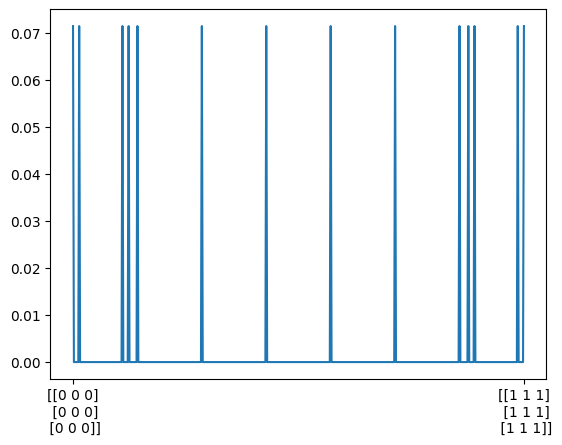

In [ ]:
dimension = (3,3)
target_probs = barstripe_pdf(dimension)
plt.plot(target_probs)
# show ticks
basis = binary_basis(dimension)
plt.xticks([0, 2**(dimension[0]*dimension[1]) - 1], [basis[0], basis[2**(dimension[0]*dimension[1]) - 1]])
plt.show = ()

4. Plot all the valid images (bars and stripes)

In [4]:
# generate samples
samples = basis[target_probs>1e-2]
n_sols = len(samples)

# show bar and stripes
def plot_bs(samples, size):
    plt.figure(facecolor='#777777')
    gs = plt.GridSpec(*size)

    for i in range(size[0]):
        for j in range(size[1]):
            if i*size[1]+j == len(samples): break
            plt.subplot(gs[i,j]).imshow(samples[i*size[1]+j], vmin=0, vmax=1)
            plt.axis('equal')
            plt.axis('off')
    plt.show = ()

size = (4,4)
plot_bs(samples, size)

NameError: name 'basis' is not defined

5. Define parameters and create an object of the QCBM class

In [5]:
dimension = (3,3)
n_qubits = np.prod(dimension)
basis = binary_basis(dimension)
basis_flat = basis.reshape(basis.shape[0], -1)
n_blocks = 8
n_shots = 20000
device = 'myQLM'
sigma_list_kernel = [0.5, 1, 2, 4]
method = "Adam"

qcbm = QCBM(
    n_qubits=n_qubits,
    basis=basis_flat,
    n_blocks=n_blocks, 
    n_shots=n_shots,
    device=device,
    sigma_list_kernel=sigma_list_kernel,
    dimension=dimension
)


NameError: name 'binary_basis' is not defined

6. Select training data

In [7]:
reweightning = False
remove_samples = False

if reweightning and remove_samples:
    pass
elif not(reweightning) and remove_samples:
    n_removed_valid_samples = 6
    valid_indices = np.where(target_probs > 1e-3)
    chosen_indices = np.random.choice(valid_indices[0], size=n_removed_valid_samples, replace=False)
    target_probs[chosen_indices] = 0.0
    # Renormalize to sum to 1
    target_probs /= target_probs.sum()

    # Print kept matrices
    size = (3,3)
    print("Printing kept valid matrices")
    plot_bs(basis[target_probs > 1e-3], size)


7. Train the QCBM

In [ ]:
max_iter = 100
result, tracking_cost, fit_time = qcbm.fit(target_probs=target_probs, method=method, max_iter=max_iter)
print(f"QCBM fitting ended in {fit_time} s")

Step 1, Loss: 0.108634
Step 2, Loss: 0.099787
Step 3, Loss: 0.094887
Step 4, Loss: 0.092192
Step 5, Loss: 0.089357
Step 6, Loss: 0.086269
Step 7, Loss: 0.082517
Step 8, Loss: 0.082004
Step 9, Loss: 0.079683
Step 10, Loss: 0.078015
Step 11, Loss: 0.076702
Step 12, Loss: 0.074662
Step 13, Loss: 0.070999
Step 14, Loss: 0.068514
Step 15, Loss: 0.066079
Step 16, Loss: 0.064580
Step 17, Loss: 0.061249
Step 18, Loss: 0.060487
Step 19, Loss: 0.058243
Step 20, Loss: 0.056557
Step 21, Loss: 0.055847
Step 22, Loss: 0.056030
Step 23, Loss: 0.053749
Step 24, Loss: 0.054667
Step 25, Loss: 0.053319
Step 26, Loss: 0.052358
Step 27, Loss: 0.051846
Step 28, Loss: 0.051338
Step 29, Loss: 0.049878
Step 30, Loss: 0.049761
Step 31, Loss: 0.049601
Step 32, Loss: 0.048569
Step 33, Loss: 0.048239
Step 34, Loss: 0.047194
Step 35, Loss: 0.047533
Step 36, Loss: 0.046846
Step 37, Loss: 0.045814
Step 38, Loss: 0.046396
Step 39, Loss: 0.044787
Step 40, Loss: 0.045126
Step 41, Loss: 0.044792
Step 42, Loss: 0.043847
S

8. Plot the training loss

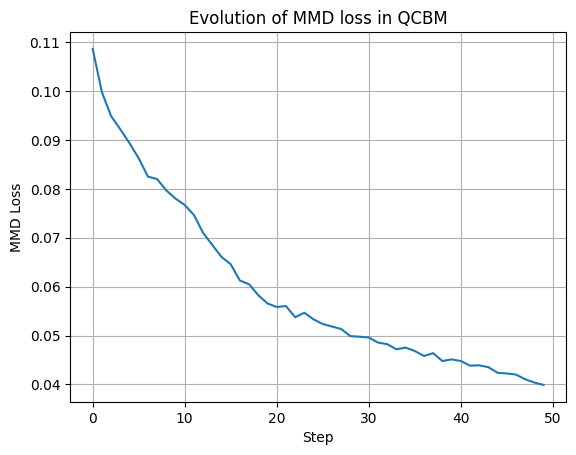

In [9]:
qcbm.plot_loss(tracking_cost)

9. Generate new samples and plot the probability distribution of the generated data

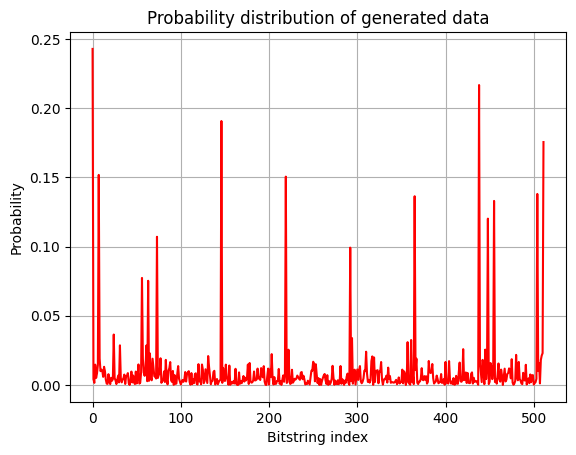

In [ ]:
n_gen_samples = 1000000
samples_matrix, samples = qcbm.generate_samples(n_gen_samples)
qcbm.plot_generated_distribution(samples)

10. Plot some generated samples to see if they are valid

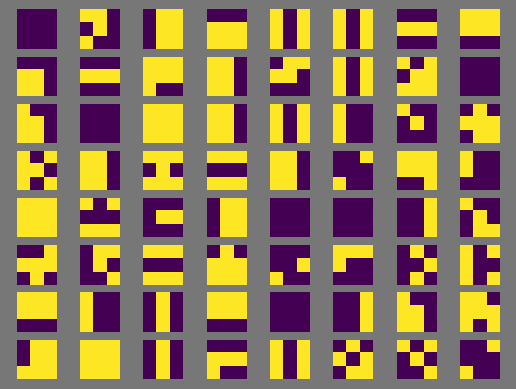

In [11]:
qcbm.plot_generated_samples(samples_matrix[0:64])

11. Calculate the generalization metrics to assess the performance of the QCBM on the bars and stripes dataset

In [12]:
x_tr = basis[target_probs > 1e-3]

metrics = qcbm.calculate_metrics(np.array(samples_matrix), x_tr, is_bs, n_sols, cost)
print("Generalization perfomance of QCBM on Bars and stripes dataset:\n", metrics)

Generalization perfomance of QCBM on Bars and stripes dataset:
 {'precision': 0.40284, 'fidelity': 0.0, 'rate': 0.0, 'coverage': 0.0, 'average cost': 1.28017}
